In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from sklearn import metrics
import pickle
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D



In [10]:
# #############################################################################
# Real benchmarked dataset
data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
#data = pd.read_csv('../../RealData/RealData_squid_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')



/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 66.49999999999991, 'Throughput(in kbps)')

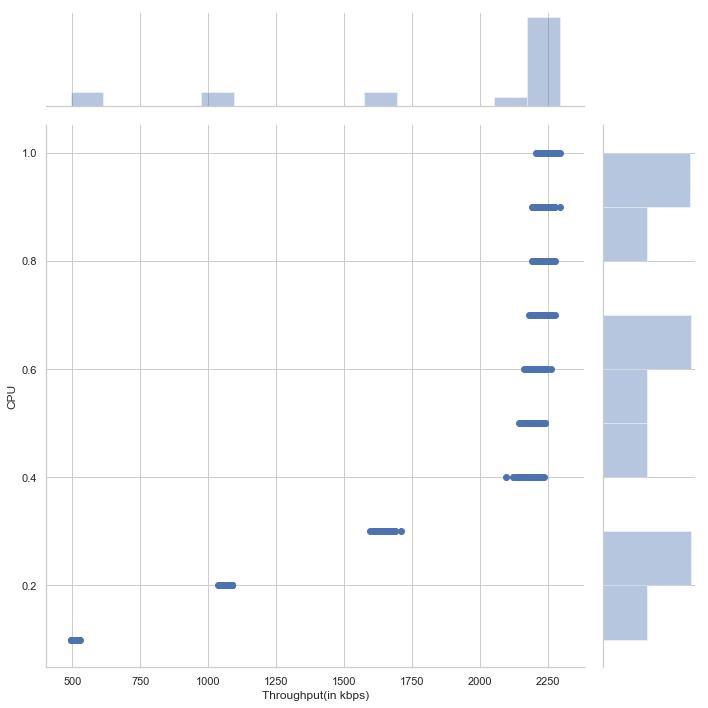

In [11]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
h = sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter",height=10)
h.ax_joint.set_xlabel('Throughput(in kbps)')


In [12]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
scaler_filename = "syntheticScaler.save"
joblib.dump(scaler, scaler_filename) 
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#Test data prediction
prediction = lm.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})


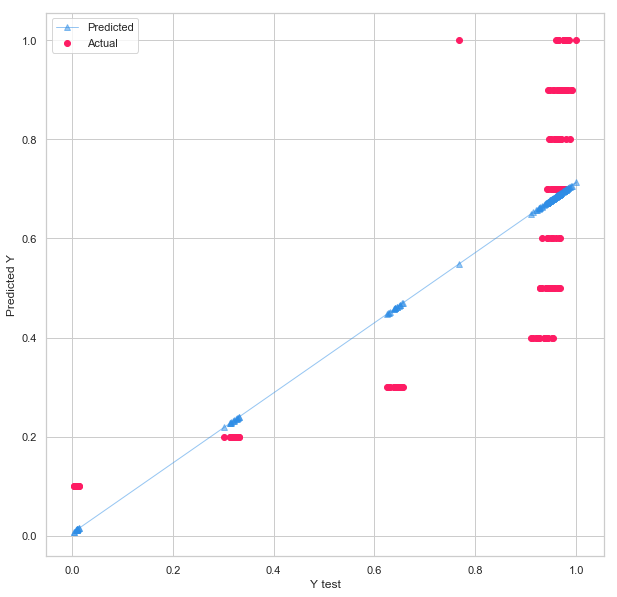

In [14]:
#Plot prediction
fig = plt.figure(figsize=(10, 10))

plt.scatter(X_test, y_test,  color='#fe1c64',label="Actual")
plt.plot(X_test, prediction, color='#2e8de6', linewidth=1,marker='^',alpha = 0.5,label="Predicted")
plt.xlabel("Y test")
plt.ylabel("Predicted Y")
plt.legend()


In [27]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2:',metrics.r2_score(y_test, prediction))

MAE: 0.1485235485482746
MSE: 0.031017744046542988
RMSE: 0.1761185511141373
R^2: 0.6222818291006258


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


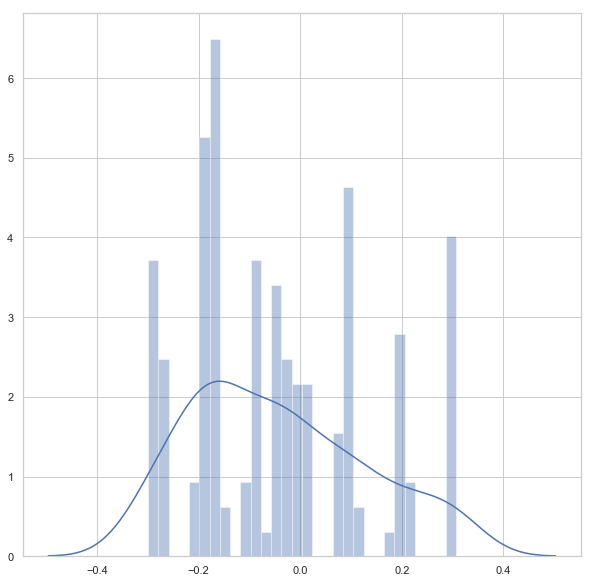

In [40]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [41]:
# save the model to disk
filename = '../models/linear_nginx_big_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [25]:
data = scaler.transform(np.float32([[2400]])) 
print(data)

[[1.0596527]]


In [26]:
lm.predict(data)

array([0.75814878])